# Brain Tumor Detector

## Definition of the Dataset

We decided to use the dataset : https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

It contains:
- 253 MRI images in total
- 98 No Tumor (38.74%)
- 155 Yes Tumor (61.26%)


## Installation and Import Packages

### Installation

In [ ]:
%pip install numpy
%pip install torch
%pip install matplotlib
%pip install scikit-learn
%pip install opencv-python

### Importing Packages 

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import cv2
import sys


## Reading MRI Images

This section reads and processes MRI images of brain scans. It’s divided into two parts: loading images with tumors and loading images without tumors.

In [7]:
# Load and process images from the dataset, return as numpy array
def load_and_process_images(path, size=(128, 128)):
    images = []
    for file in glob.iglob(path):
        img = cv2.imread(file)
        img = cv2.resize(img, size)
        # Convert from BGR to RGB for visualization consistency
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return np.array(images)


healthy_images = load_and_process_images('data/no/*.jpg')
infected_images = load_and_process_images('data/yes/*.jpg')

## Visualizing Brain MRI Images

The plot_images function is defined to visualize images from each category, "healthy" and "infected":

In [ ]:
def plot_images(images, title):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    fig.suptitle(title)
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f'Shape: {img.shape}')
    plt.show()

The images parameter receives a random list of images of each category.

<Figure size 1600x900 with 0 Axes>

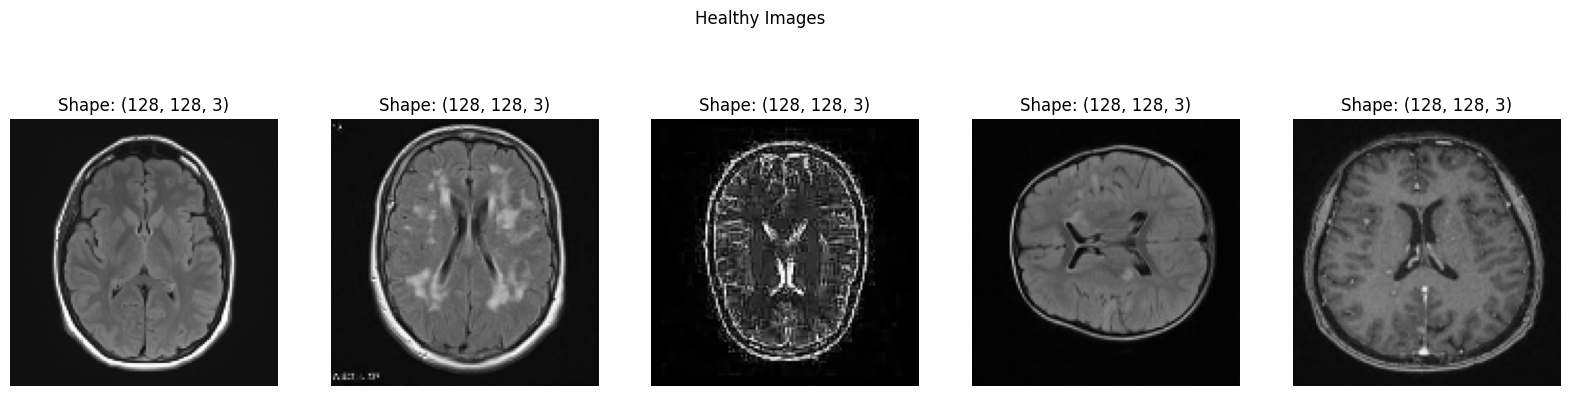

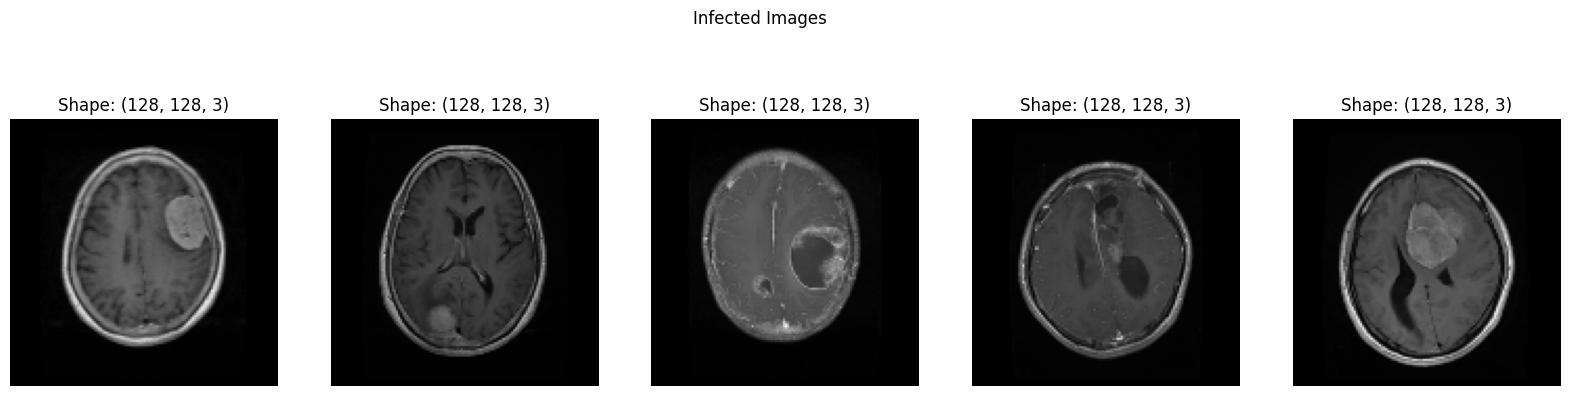

In [32]:
plt.figure(figsize=(16,9))

# Plot some healthy and infected images to visualize the data
plot_images(healthy_images[np.random.choice(healthy_images.shape[0], 5, replace=False)], 'Healthy Images')
plot_images(infected_images[np.random.choice(infected_images.shape[0], 5, replace=False)], 'Infected Images')